## 1. масштабирование признаков (не менее чем тремя способами);
Масштабирование - это изменение диапазона измерения признака с целью улучшения качества построения модели.

In [21]:
#Загрузка и предобработка данных
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [22]:
housing = fetch_california_housing()
data = pd.DataFrame(housing.data,
                      columns=housing.feature_names)
data['Y'] = housing.target
data.shape

(20640, 9)

In [23]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
# Нужно ли масштабирование
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [25]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop('Y', axis=1)
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Y'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((16512, 8), (4128, 8))

Масштабирование данных на основе Z-оценки

In [26]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [27]:
data_cs11_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


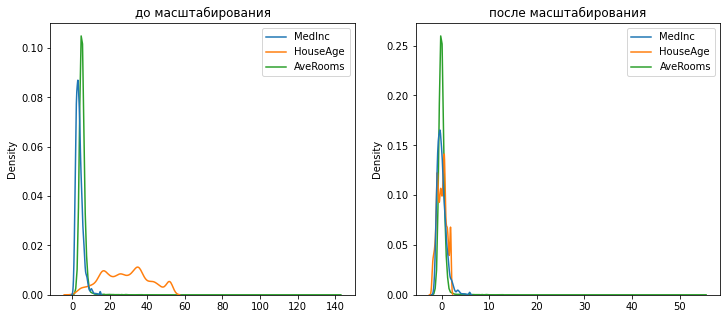

In [30]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

draw_kde(['MedInc', 'HouseAge', 'AveRooms'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')


In [31]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)
data_cs12_scaled_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-1.663183e-16,5.239134e-17,1.912768e-16,2.119321e-16,2.280691e-17,1.183377e-18,3.050962e-16,-1.818528e-15
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-1.784934e+00,-2.193326e+00,-1.758064e+00,-1.510898e+00,-1.265666e+00,-2.022041e-01,-1.446964e+00,-2.354008e+00
25%,-6.894428e-01,-8.425832e-01,-3.830692e-01,-1.840409e-01,-5.688744e-01,-5.757397e-02,-7.965259e-01,-1.113670e+00
50%,-1.753078e-01,3.142707e-02,-8.210226e-02,-1.001681e-01,-2.324925e-01,-2.427528e-02,-6.421054e-01,5.401142e-01
75%,4.619818e-01,6.670709e-01,2.359401e-01,-4.655013e-05,2.649611e-01,1.542318e-02,9.722905e-01,7.792156e-01
max,5.880939e+00,1.858903e+00,5.221361e+01,6.500353e+01,3.048505e+01,1.069443e+02,2.956360e+00,2.622289e+00


In [32]:
data_cs12_scaled_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-0.014481,0.013911,-0.023175,-0.028812,0.000977,-0.010484,-0.000777,0.011417
std,1.021662,0.999880,0.692871,0.604269,1.038310,0.100045,0.997493,0.989980
min,-1.784934,-2.113871,-1.521001,-1.428741,-1.258546,-0.207179,-1.437605,-2.378915
25%,-0.712242,-0.842583,-0.381876,-0.186036,-0.564647,-0.056193,-0.791846,-1.058876
50%,-0.198860,0.031427,-0.076683,-0.101062,-0.220479,-0.021970,-0.642105,0.530152
75%,0.451514,0.667071,0.224293,-0.000800,0.271190,0.019040,0.976970,0.784197
max,5.880939,1.858903,17.369108,18.082473,24.152526,4.165286,2.914245,2.502738


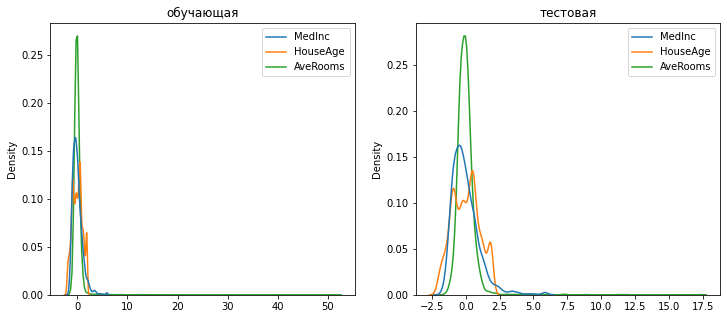

In [33]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['MedInc', 'HouseAge', 'AveRooms'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')


Масштабирование "Mean Normalisation"

In [34]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [35]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-0.000378,0.000687,-0.000086,-0.000087,0.000006,-0.000020,-0.000035,0.000459
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.200554
min,-0.232842,-0.541264,-0.032574,-0.022715,-0.039863,-0.001934,-0.328607,-0.478049
25%,-0.090533,-0.207931,-0.007092,-0.002772,-0.017889,-0.000535,-0.180892,-0.222794
50%,-0.023541,0.007756,-0.001503,-0.001506,-0.007266,-0.000223,-0.145823,0.108537
75%,0.059799,0.164618,0.004333,-0.000002,0.008401,0.000151,0.220808,0.156585
max,0.767158,0.458736,0.967426,0.977285,0.960137,0.998113,0.671393,0.526956


In [36]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)
data_cs22_scaled_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-2.183869e-17,1.328610e-17,3.477852e-18,3.187050e-18,7.732295e-19,1.197665e-20,6.928136e-17,-3.649105e-16
std,1.304522e-01,2.467852e-01,1.852880e-02,1.503479e-02,3.149631e-02,9.333299e-03,2.271081e-01,2.009587e-01
min,-2.328416e-01,-5.412641e-01,-3.257383e-02,-2.271534e-02,-3.986258e-02,-1.887174e-03,-3.286072e-01,-4.730442e-01
25%,-8.993664e-02,-2.079308e-01,-7.097596e-03,-2.766932e-03,-1.791690e-02,-5.373388e-04,-1.808920e-01,-2.237950e-01
50%,-2.286860e-02,7.755500e-03,-1.521210e-03,-1.505960e-03,-7.322435e-03,-2.265616e-04,-1.458229e-01,1.085374e-01
75%,6.026474e-02,1.646182e-01,4.371553e-03,-6.998501e-07,8.345045e-03,1.439448e-04,2.208083e-01,1.565854e-01
max,7.671584e-01,4.587359e-01,9.674262e-01,9.772847e-01,9.601374e-01,9.981128e-01,6.713928e-01,5.269558e-01


In [37]:
data_cs22_scaled_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-0.001889,0.003433,-0.000429,-0.000433,0.000031,-0.000098,-0.000176,0.002294
std,0.133274,0.246748,0.012838,0.009085,0.032702,0.000934,0.226532,0.198939
min,-0.232842,-0.521656,-0.028181,-0.021480,-0.039638,-0.001934,-0.326482,-0.478049
25%,-0.092911,-0.207931,-0.007075,-0.002797,-0.017784,-0.000524,-0.179829,-0.212784
50%,-0.025941,0.007756,-0.001421,-0.001519,-0.006944,-0.000205,-0.145823,0.106535
75%,0.058899,0.164618,0.004156,-0.000012,0.008541,0.000178,0.221871,0.157586
max,0.767158,0.458736,0.321819,0.271858,0.760692,0.038875,0.661829,0.502932


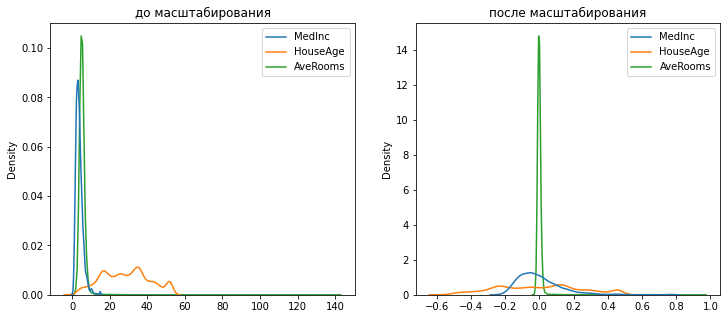

In [39]:
draw_kde(['MedInc', 'HouseAge', 'AveRooms'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')


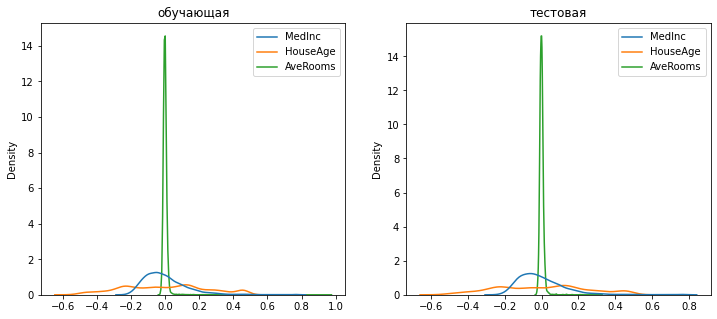

In [40]:
draw_kde(['MedInc', 'HouseAge', 'AveRooms'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')


MinMax-масштабирование

In [41]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


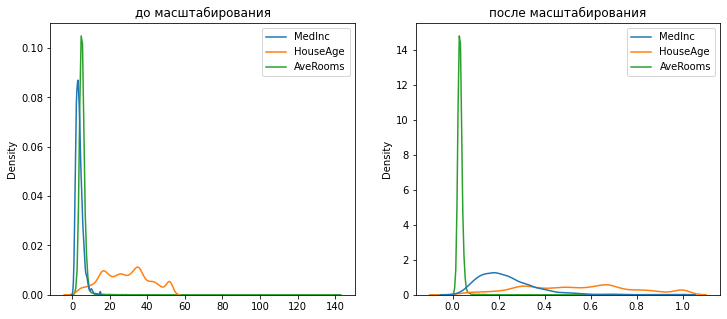

In [43]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

draw_kde(['MedInc', 'HouseAge', 'AveRooms'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

## 2. обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);

In [48]:
#Загрузка и предобработка данных
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [49]:
x_col_list = ['MedInc', 'HouseAge', 'AveRooms']

In [50]:

housing = fetch_california_housing()
data = pd.DataFrame(housing.data,
                      columns=housing.feature_names)
data['Y'] = housing.target
data.shape

(20640, 9)

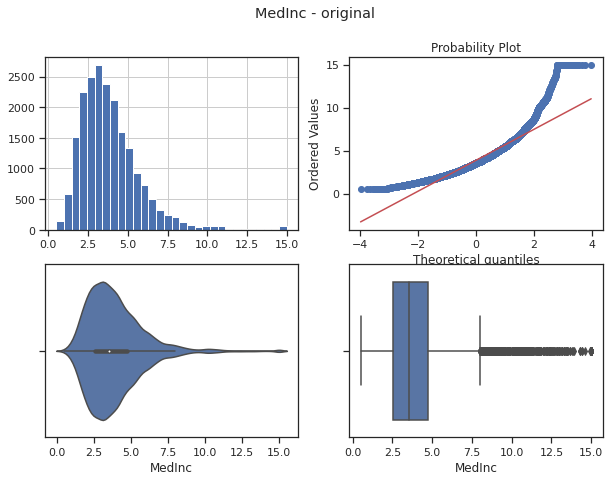

In [51]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

diagnostic_plots(data, 'MedInc', 'MedInc - original')

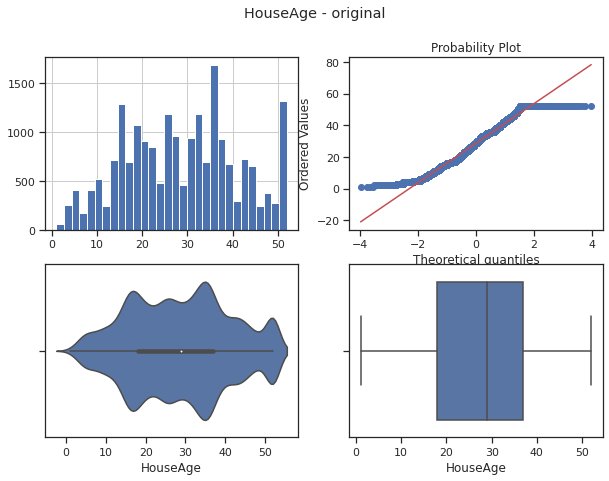

In [52]:
diagnostic_plots(data, 'HouseAge', 'HouseAge - original')

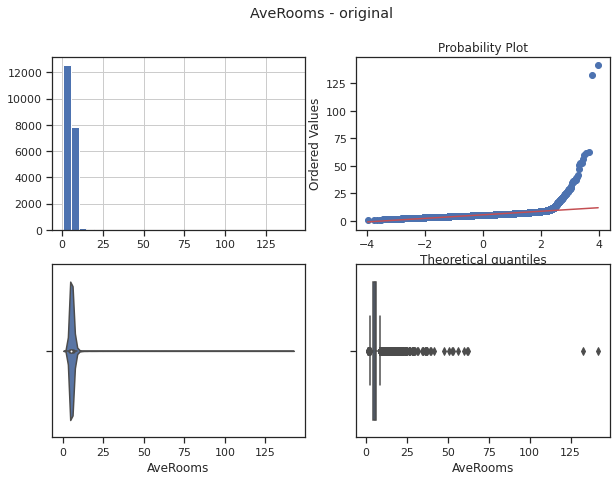

In [53]:
diagnostic_plots(data, 'AveRooms', 'AveRooms - original')

In [55]:
#Устранение выбросов
data.shape

(20640, 9)

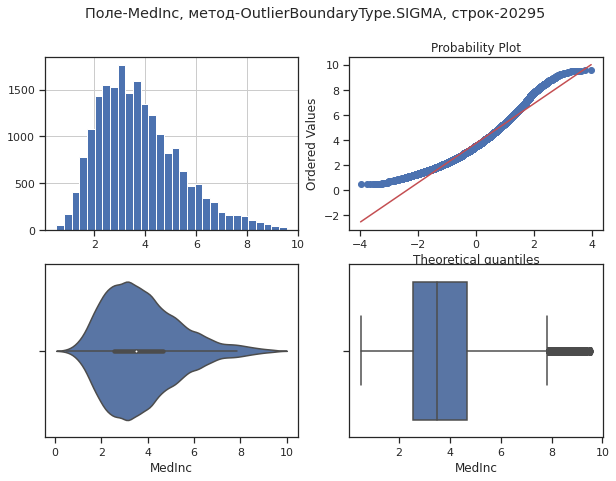

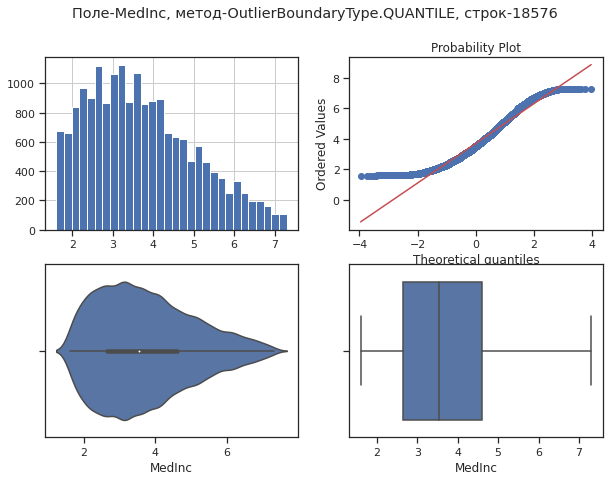

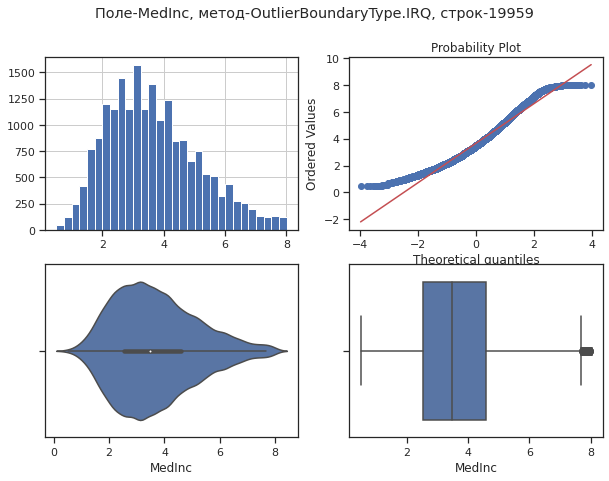

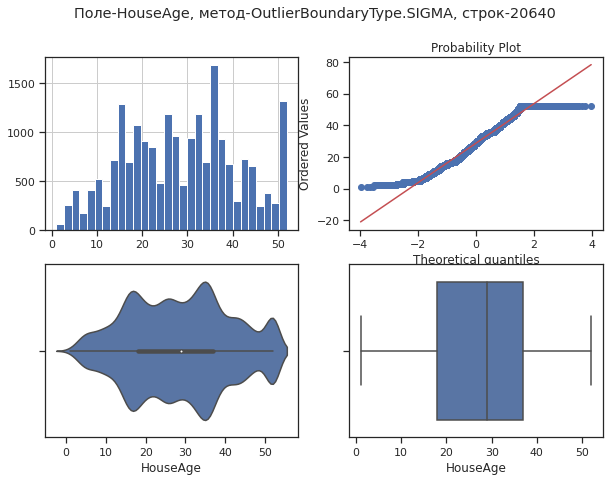

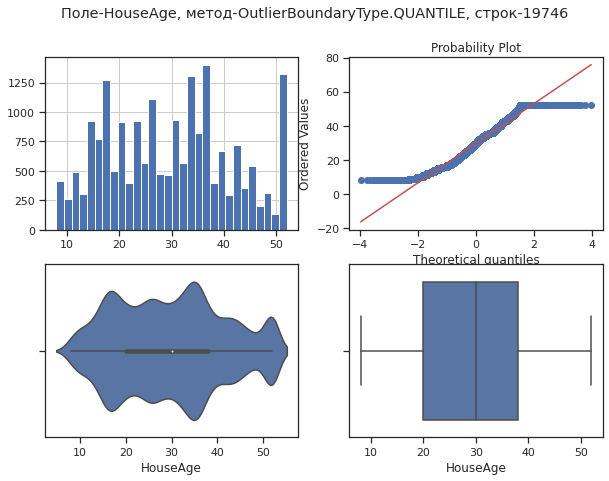

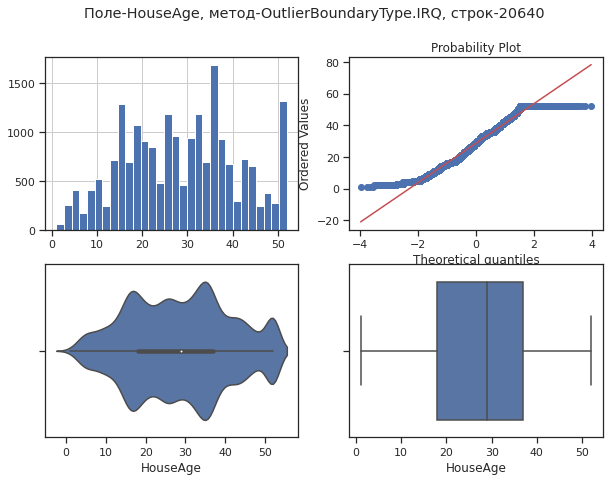

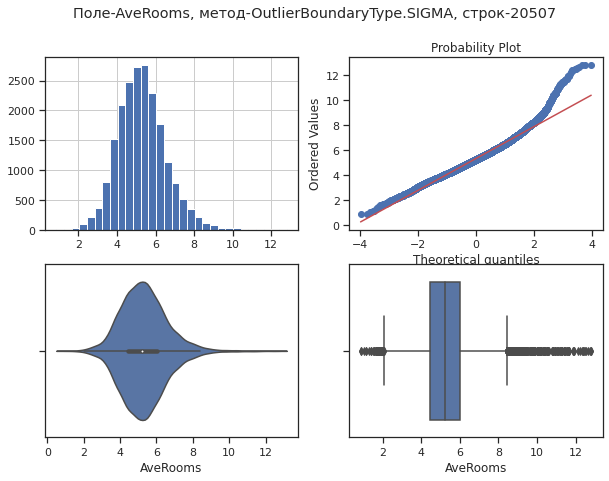

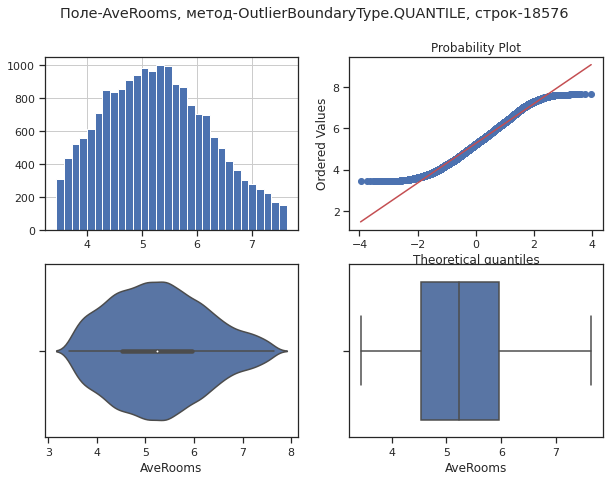

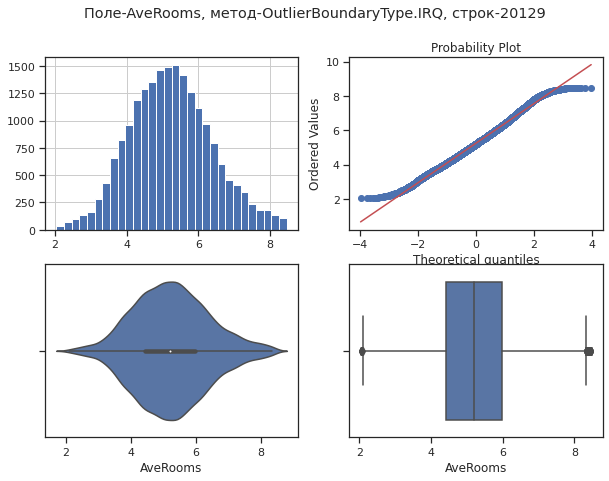

In [57]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary    
    
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

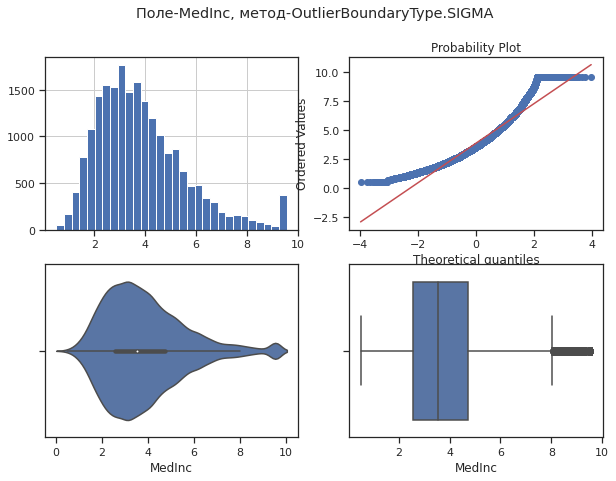

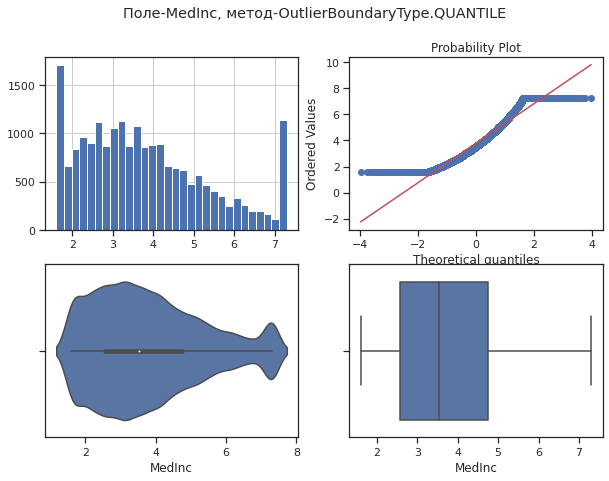

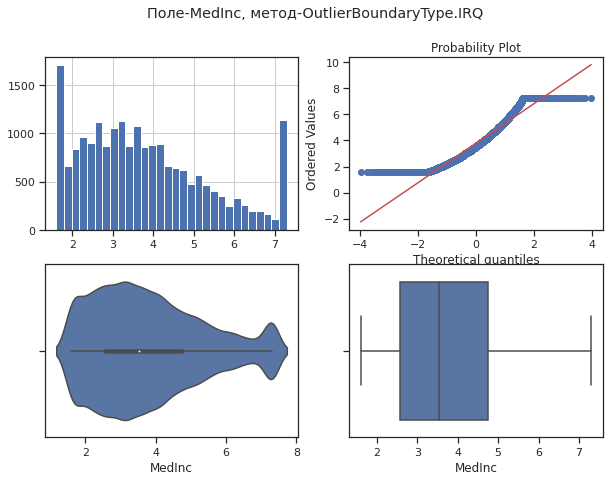

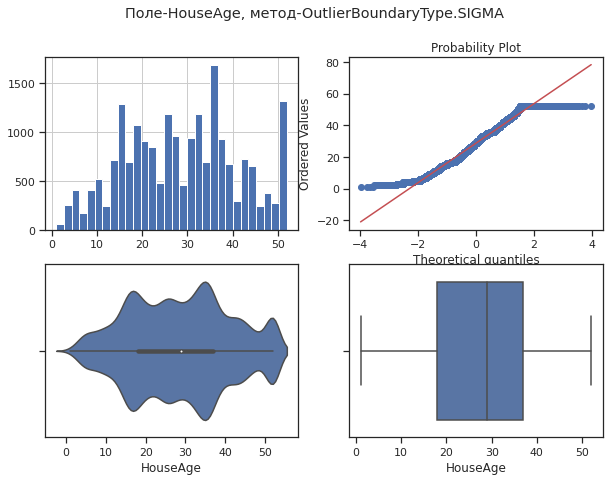

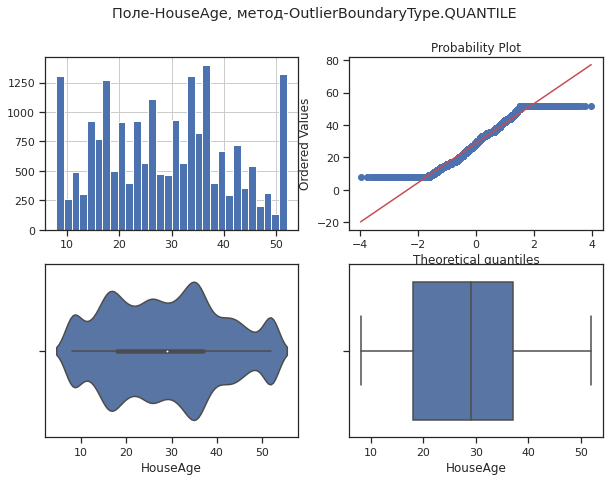

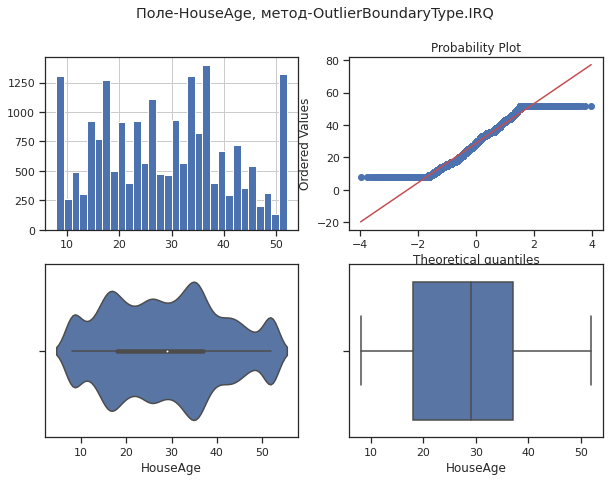

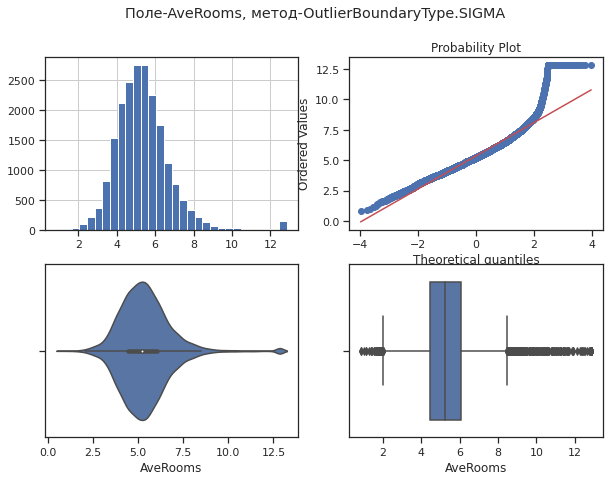

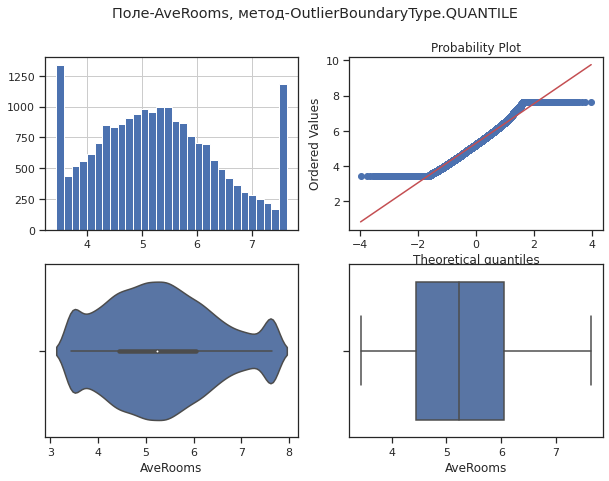

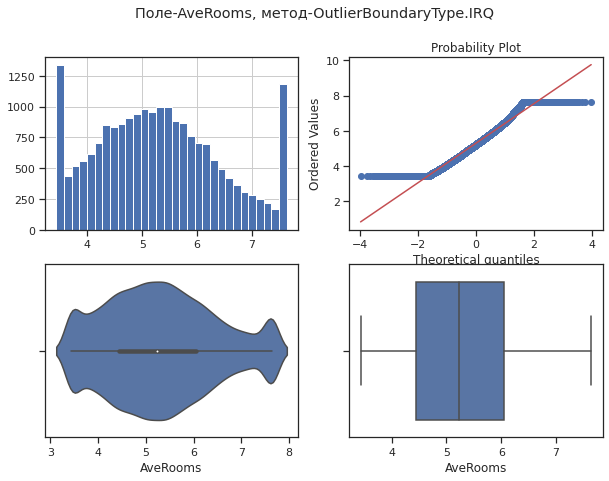

In [58]:
#Замена выбросов
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

## 3. обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import ipaddress
import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [90]:
data = pd.read_csv('/content/111.csv', sep=',')
data.shape

(839, 4)

In [91]:
data.head()

,IP,Time,URL,Staus
0,10.131.0.1,[22/Feb/2018:12:44:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200
1,10.131.0.1,[22/Feb/2018:12:44:07,GET /js/vendor/moment.min.js HTTP/1.1,200
2,10.128.2.1,[22/Feb/2018:12:44:55,POST /compile.php HTTP/1.1,200
3,10.128.2.1,[22/Feb/2018:13:01:19,GET /home.php HTTP/1.1,302
4,10.128.2.1,[22/Feb/2018:13:01:20,GET /login.php HTTP/1.1,200


In [92]:
# Целевой признак
data['Staus'].value_counts()

200    690
302     99
304     26
404     20
206      4
Name: Staus, dtype: int64

In [93]:
# Закодируем целевой признак
target_le = LabelEncoder()
data['staus_le'] = target_le.fit_transform(data['Staus'])
data['staus_le'].unique(), target_le.inverse_transform(data['staus_le'].unique())


(array([0, 2, 1, 4, 3]), array([200, 302, 206, 404, 304]))

In [94]:
data.dtypes

IP          object
Time        object
URL         object
Staus        int64
staus_le     int64
dtype: object

In [95]:
#Выделение признаков из URL-адреса
# Проверка наличия подстроки в URL
def substr_in_url(substr):
    lsubstr = substr.lower()
    return data.apply(lambda x: 1 if lsubstr in x['URL'].lower() else 0, axis=1)

data['is_get'] = substr_in_url('GET')
data['is_php'] = substr_in_url('PHP')
data['is_js'] = substr_in_url('JS')
data['is_woff'] = substr_in_url('WOFF')
url_features = ['is_get', 'is_php', 'is_js', 'is_woff']
data.head()

,IP,Time,URL,Staus,staus_le,is_get,is_php,is_js,is_woff
0,10.131.0.1,[22/Feb/2018:12:44:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,0,1,0,1,0
1,10.131.0.1,[22/Feb/2018:12:44:07,GET /js/vendor/moment.min.js HTTP/1.1,200,0,1,0,1,0
2,10.128.2.1,[22/Feb/2018:12:44:55,POST /compile.php HTTP/1.1,200,0,0,1,0,0
3,10.128.2.1,[22/Feb/2018:13:01:19,GET /home.php HTTP/1.1,302,2,1,1,0,0
4,10.128.2.1,[22/Feb/2018:13:01:20,GET /login.php HTTP/1.1,200,0,1,1,0,0


In [96]:
data['dt'] = data.apply(lambda x: pd.to_datetime(x['Time'], format='[%d/%b/%Y:%H:%M:%S'), axis=1)
data.head()

,IP,Time,URL,Staus,staus_le,is_get,is_php,is_js,is_woff,dt
0,10.131.0.1,[22/Feb/2018:12:44:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,0,1,0,1,0,2018-02-22 12:44:06
1,10.131.0.1,[22/Feb/2018:12:44:07,GET /js/vendor/moment.min.js HTTP/1.1,200,0,1,0,1,0,2018-02-22 12:44:07
2,10.128.2.1,[22/Feb/2018:12:44:55,POST /compile.php HTTP/1.1,200,0,0,1,0,0,2018-02-22 12:44:55
3,10.128.2.1,[22/Feb/2018:13:01:19,GET /home.php HTTP/1.1,302,2,1,1,0,0,2018-02-22 13:01:19
4,10.128.2.1,[22/Feb/2018:13:01:20,GET /login.php HTTP/1.1,200,0,1,1,0,0,2018-02-22 13:01:20


In [97]:
data.dtypes

IP                  object
Time                object
URL                 object
Staus                int64
staus_le             int64
is_get               int64
is_php               int64
is_js                int64
is_woff              int64
dt          datetime64[ns]
dtype: object

In [99]:
# День
data['day'] = data['dt'].dt.day
# Месяц
data['month'] = data['dt'].dt.month
# Год
data['year'] = data['dt'].dt.year
# Часы
data['hour'] = data['dt'].dt.hour
#Минуты
data['minute'] = data['dt'].dt.minute
#Секунды
data['second'] = data['dt'].dt.second
#Неделя года
data['week'] = data['dt'].dt.isocalendar().week
#Квартал
data['quarter'] = data['dt'].dt.quarter
#День недели 
data['dayofweek'] = data['dt'].dt.dayofweek
#Выходной день
data['day_name'] = data['dt'].dt.day_name()
data['is_holiday'] = data.apply(lambda x: 1 if x['dt'].dayofweek in [5,6] else 0, axis=1)

In [100]:
data.head()

,IP,Time,URL,Staus,staus_le,is_get,is_php,is_js,is_woff,dt,...,month,year,hour,minute,second,week,quarter,dayofweek,day_name,is_holiday
0,10.131.0.1,[22/Feb/2018:12:44:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,0,1,0,1,0,2018-02-22 12:44:06,...,2,2018,12,44,6,8,1,3,Thursday,0
1,10.131.0.1,[22/Feb/2018:12:44:07,GET /js/vendor/moment.min.js HTTP/1.1,200,0,1,0,1,0,2018-02-22 12:44:07,...,2,2018,12,44,7,8,1,3,Thursday,0
2,10.128.2.1,[22/Feb/2018:12:44:55,POST /compile.php HTTP/1.1,200,0,0,1,0,0,2018-02-22 12:44:55,...,2,2018,12,44,55,8,1,3,Thursday,0
3,10.128.2.1,[22/Feb/2018:13:01:19,GET /home.php HTTP/1.1,302,2,1,1,0,0,2018-02-22 13:01:19,...,2,2018,13,1,19,8,1,3,Thursday,0
4,10.128.2.1,[22/Feb/2018:13:01:20,GET /login.php HTTP/1.1,200,0,1,1,0,0,2018-02-22 13:01:20,...,2,2018,13,1,20,8,1,3,Thursday,0


In [101]:
# Создадим масштабируемые признаки для дальнейших экспериментов
dt_features = ['year', 'day', 'month', 'hour', 'minute', 'second', 'week', 'quarter', 'dayofweek']
dt_features_scaled = []
for f in dt_features:
    f_new = str(f + '_scaled')
    dt_features_scaled.append(f_new)
    data[f_new] = MinMaxScaler().fit_transform(data[[f]])
dt_features_scaled

['year_scaled',
 'day_scaled',
 'month_scaled',
 'hour_scaled',
 'minute_scaled',
 'second_scaled',
 'week_scaled',
 'quarter_scaled',
 'dayofweek_scaled']

In [102]:
data.head()

,IP,Time,URL,Staus,staus_le,is_get,is_php,is_js,is_woff,dt,...,is_holiday,year_scaled,day_scaled,month_scaled,hour_scaled,minute_scaled,second_scaled,week_scaled,quarter_scaled,dayofweek_scaled
0,10.131.0.1,[22/Feb/2018:12:44:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,0,1,0,1,0,2018-02-22 12:44:06,...,0,0.0,0.777778,0.0,0.521739,0.745763,0.101695,0.0,0.0,0.5
1,10.131.0.1,[22/Feb/2018:12:44:07,GET /js/vendor/moment.min.js HTTP/1.1,200,0,1,0,1,0,2018-02-22 12:44:07,...,0,0.0,0.777778,0.0,0.521739,0.745763,0.118644,0.0,0.0,0.5
2,10.128.2.1,[22/Feb/2018:12:44:55,POST /compile.php HTTP/1.1,200,0,0,1,0,0,2018-02-22 12:44:55,...,0,0.0,0.777778,0.0,0.521739,0.745763,0.932203,0.0,0.0,0.5
3,10.128.2.1,[22/Feb/2018:13:01:19,GET /home.php HTTP/1.1,302,2,1,1,0,0,2018-02-22 13:01:19,...,0,0.0,0.777778,0.0,0.565217,0.016949,0.322034,0.0,0.0,0.5
4,10.128.2.1,[22/Feb/2018:13:01:20,GET /login.php HTTP/1.1,200,0,1,1,0,0,2018-02-22 13:01:20,...,0,0.0,0.777778,0.0,0.565217,0.016949,0.338983,0.0,0.0,0.5


In [103]:
# Временные интервалы
# Разница между датами 
data['now'] = datetime.datetime.today()
data['diff'] = data['now'] - data['dt']
data.dtypes

IP                           object
Time                         object
URL                          object
Staus                         int64
staus_le                      int64
is_get                        int64
is_php                        int64
is_js                         int64
is_woff                       int64
dt                   datetime64[ns]
day                           int64
month                         int64
year                          int64
hour                          int64
minute                        int64
second                        int64
week                         UInt32
quarter                       int64
dayofweek                     int64
day_name                     object
is_holiday                    int64
year_scaled                 float64
day_scaled                  float64
month_scaled                float64
hour_scaled                 float64
minute_scaled               float64
second_scaled               float64
week_scaled                 

In [104]:
data.head()

,IP,Time,URL,Staus,staus_le,is_get,is_php,is_js,is_woff,dt,...,day_scaled,month_scaled,hour_scaled,minute_scaled,second_scaled,week_scaled,quarter_scaled,dayofweek_scaled,now,diff
0,10.131.0.1,[22/Feb/2018:12:44:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,0,1,0,1,0,2018-02-22 12:44:06,...,0.777778,0.0,0.521739,0.745763,0.101695,0.0,0.0,0.5,2023-03-14 13:57:19.107893,1846 days 01:13:13.107893
1,10.131.0.1,[22/Feb/2018:12:44:07,GET /js/vendor/moment.min.js HTTP/1.1,200,0,1,0,1,0,2018-02-22 12:44:07,...,0.777778,0.0,0.521739,0.745763,0.118644,0.0,0.0,0.5,2023-03-14 13:57:19.107893,1846 days 01:13:12.107893
2,10.128.2.1,[22/Feb/2018:12:44:55,POST /compile.php HTTP/1.1,200,0,0,1,0,0,2018-02-22 12:44:55,...,0.777778,0.0,0.521739,0.745763,0.932203,0.0,0.0,0.5,2023-03-14 13:57:19.107893,1846 days 01:12:24.107893
3,10.128.2.1,[22/Feb/2018:13:01:19,GET /home.php HTTP/1.1,302,2,1,1,0,0,2018-02-22 13:01:19,...,0.777778,0.0,0.565217,0.016949,0.322034,0.0,0.0,0.5,2023-03-14 13:57:19.107893,1846 days 00:56:00.107893
4,10.128.2.1,[22/Feb/2018:13:01:20,GET /login.php HTTP/1.1,200,0,1,1,0,0,2018-02-22 13:01:20,...,0.777778,0.0,0.565217,0.016949,0.338983,0.0,0.0,0.5,2023-03-14 13:57:19.107893,1846 days 00:55:59.107893


In [105]:
# Чтобы получить разницу между датами в заданных единицах 
# (минутах, днях и т.д.) нужно разделить timedelta64 на длительность
data['diff_days']=data['diff']/np.timedelta64(1,'D')
data.dtypes

IP                           object
Time                         object
URL                          object
Staus                         int64
staus_le                      int64
is_get                        int64
is_php                        int64
is_js                         int64
is_woff                       int64
dt                   datetime64[ns]
day                           int64
month                         int64
year                          int64
hour                          int64
minute                        int64
second                        int64
week                         UInt32
quarter                       int64
dayofweek                     int64
day_name                     object
is_holiday                    int64
year_scaled                 float64
day_scaled                  float64
month_scaled                float64
hour_scaled                 float64
minute_scaled               float64
second_scaled               float64
week_scaled                 

In [106]:
data.head()

,IP,Time,URL,Staus,staus_le,is_get,is_php,is_js,is_woff,dt,...,month_scaled,hour_scaled,minute_scaled,second_scaled,week_scaled,quarter_scaled,dayofweek_scaled,now,diff,diff_days
0,10.131.0.1,[22/Feb/2018:12:44:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,0,1,0,1,0,2018-02-22 12:44:06,...,0.0,0.521739,0.745763,0.101695,0.0,0.0,0.5,2023-03-14 13:57:19.107893,1846 days 01:13:13.107893,1846.050846
1,10.131.0.1,[22/Feb/2018:12:44:07,GET /js/vendor/moment.min.js HTTP/1.1,200,0,1,0,1,0,2018-02-22 12:44:07,...,0.0,0.521739,0.745763,0.118644,0.0,0.0,0.5,2023-03-14 13:57:19.107893,1846 days 01:13:12.107893,1846.050835
2,10.128.2.1,[22/Feb/2018:12:44:55,POST /compile.php HTTP/1.1,200,0,0,1,0,0,2018-02-22 12:44:55,...,0.0,0.521739,0.745763,0.932203,0.0,0.0,0.5,2023-03-14 13:57:19.107893,1846 days 01:12:24.107893,1846.050279
3,10.128.2.1,[22/Feb/2018:13:01:19,GET /home.php HTTP/1.1,302,2,1,1,0,0,2018-02-22 13:01:19,...,0.0,0.565217,0.016949,0.322034,0.0,0.0,0.5,2023-03-14 13:57:19.107893,1846 days 00:56:00.107893,1846.038890
4,10.128.2.1,[22/Feb/2018:13:01:20,GET /login.php HTTP/1.1,200,0,1,1,0,0,2018-02-22 13:01:20,...,0.0,0.565217,0.016949,0.338983,0.0,0.0,0.5,2023-03-14 13:57:19.107893,1846 days 00:55:59.107893,1846.038879


In [107]:
#Отображение на круг
def round_code(v, T, cos_flag = True):
    x = 2*np.pi*v/T
    if cos_flag:
        return np.cos(x)
    else:
        return np.sin(x)
# Опеределим периоды для признаков
for f in dt_features:
    print(f, data[f].min(), data[f].max())

# периоды для признаков
dt_features_periods = [0, 31, 12, 24, 60, 60, 52, 4, 7]
data['year_round'] = data.apply(lambda x: 1 if x['year']==2017 else 0, axis=1)
dt_features_round = ['year_round']
data.head()

year 2018 2018
day 1 28
month 2 3
hour 0 23
minute 0 59
second 0 59
week 8 9
quarter 1 1
dayofweek 0 6


,IP,Time,URL,Staus,staus_le,is_get,is_php,is_js,is_woff,dt,...,hour_scaled,minute_scaled,second_scaled,week_scaled,quarter_scaled,dayofweek_scaled,now,diff,diff_days,year_round
0,10.131.0.1,[22/Feb/2018:12:44:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,0,1,0,1,0,2018-02-22 12:44:06,...,0.521739,0.745763,0.101695,0.0,0.0,0.5,2023-03-14 13:57:19.107893,1846 days 01:13:13.107893,1846.050846,0
1,10.131.0.1,[22/Feb/2018:12:44:07,GET /js/vendor/moment.min.js HTTP/1.1,200,0,1,0,1,0,2018-02-22 12:44:07,...,0.521739,0.745763,0.118644,0.0,0.0,0.5,2023-03-14 13:57:19.107893,1846 days 01:13:12.107893,1846.050835,0
2,10.128.2.1,[22/Feb/2018:12:44:55,POST /compile.php HTTP/1.1,200,0,0,1,0,0,2018-02-22 12:44:55,...,0.521739,0.745763,0.932203,0.0,0.0,0.5,2023-03-14 13:57:19.107893,1846 days 01:12:24.107893,1846.050279,0
3,10.128.2.1,[22/Feb/2018:13:01:19,GET /home.php HTTP/1.1,302,2,1,1,0,0,2018-02-22 13:01:19,...,0.565217,0.016949,0.322034,0.0,0.0,0.5,2023-03-14 13:57:19.107893,1846 days 00:56:00.107893,1846.038890,0
4,10.128.2.1,[22/Feb/2018:13:01:20,GET /login.php HTTP/1.1,200,0,1,1,0,0,2018-02-22 13:01:20,...,0.565217,0.016949,0.338983,0.0,0.0,0.5,2023-03-14 13:57:19.107893,1846 days 00:55:59.107893,1846.038879,0


In [108]:
%%time
# Построим отображение признаков на круг, год пропускаем
for f,p in zip(dt_features[1:], dt_features_periods[1:]):
    f_cos = str(f + '_cos')
    f_sin = str(f + '_sin')
    data[f_cos] = data.apply(lambda x: round_code(x[f], p), axis=1)
    data[f_sin] = data.apply(lambda x: round_code(x[f], p, False), axis=1)
    dt_features_round.append(f_cos)
    dt_features_round.append(f_sin)
dt_features_round    

CPU times: user 251 ms, sys: 1.16 ms, total: 252 ms
Wall time: 252 ms


['year_round',
 'day_cos',
 'day_sin',
 'month_cos',
 'month_sin',
 'hour_cos',
 'hour_sin',
 'minute_cos',
 'minute_sin',
 'second_cos',
 'second_sin',
 'week_cos',
 'week_sin',
 'quarter_cos',
 'quarter_sin',
 'dayofweek_cos',
 'dayofweek_sin']

In [109]:
data.head()

,IP,Time,URL,Staus,staus_le,is_get,is_php,is_js,is_woff,dt,...,minute_cos,minute_sin,second_cos,second_sin,week_cos,week_sin,quarter_cos,quarter_sin,dayofweek_cos,dayofweek_sin
0,10.131.0.1,[22/Feb/2018:12:44:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,0,1,0,1,0,2018-02-22 12:44:06,...,-0.104528,-0.994522,0.809017,0.587785,0.568065,0.822984,6.123234e-17,1.0,-0.900969,0.433884
1,10.131.0.1,[22/Feb/2018:12:44:07,GET /js/vendor/moment.min.js HTTP/1.1,200,0,1,0,1,0,2018-02-22 12:44:07,...,-0.104528,-0.994522,0.743145,0.669131,0.568065,0.822984,6.123234e-17,1.0,-0.900969,0.433884
2,10.128.2.1,[22/Feb/2018:12:44:55,POST /compile.php HTTP/1.1,200,0,0,1,0,0,2018-02-22 12:44:55,...,-0.104528,-0.994522,0.866025,-0.500000,0.568065,0.822984,6.123234e-17,1.0,-0.900969,0.433884
3,10.128.2.1,[22/Feb/2018:13:01:19,GET /home.php HTTP/1.1,302,2,1,1,0,0,2018-02-22 13:01:19,...,0.994522,0.104528,-0.406737,0.913545,0.568065,0.822984,6.123234e-17,1.0,-0.900969,0.433884
4,10.128.2.1,[22/Feb/2018:13:01:20,GET /login.php HTTP/1.1,200,0,1,1,0,0,2018-02-22 13:01:20,...,0.994522,0.104528,-0.500000,0.866025,0.568065,0.822984,6.123234e-17,1.0,-0.900969,0.433884


## 4. отбор признаков

### один метод из группы методов фильтрации (filter methods);

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [3]:
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_feature_names = iris['feature_names']
iris_x_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

housing = fetch_california_housing()
housing_X = housing.data
housing_y = housing.target
housing_feature_names = housing['feature_names']
housing_x_df = pd.DataFrame(data=housing['data'], columns=housing['feature_names'])

Методы, основанные на корреляции

In [9]:
data = pd.read_csv('/content/ds.salaries.csv', sep=",")

<AxesSubplot:>

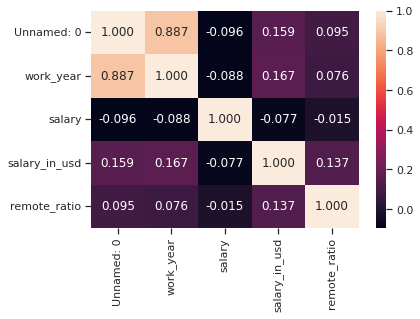

In [10]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

In [11]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

make_corr_df(data)

,f1,f2,corr
0,Unnamed: 0,work_year,0.88655
1,work_year,Unnamed: 0,0.88655


In [12]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['work_year', 'Unnamed: 0']]

### один метод из группы методов обертывания (wrapper methods);

In [ ]:
#Методы обертывания (wrapper methods)
Image('img/fs_wrapper.png', width='80%')

In [13]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
knn = KNeighborsClassifier(n_neighbors=3)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(iris_X, iris_y, custom_feature_names=iris_feature_names)

print('\nBest accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 11/11


Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')


In [26]:
efs2 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(iris_X, iris_y, custom_feature_names=iris_feature_names)

print('\nBest accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

Features: 10/10


Best accuracy score: 0.96
Best subset (indices): (3,)
Best subset (corresponding names): ('petal width (cm)',)


### один метод из группы методов вложений (embedded methods).
Использование моделей на основе решающего дерева

In [39]:
dtc1 = DecisionTreeClassifier()
rfc1 = RandomForestClassifier()
gbc1 = GradientBoostingClassifier()
dtc1.fit(iris_X, iris_y)
rfc1.fit(iris_X, iris_y)
gbc1.fit(iris_X, iris_y)

# Важность признаков
dtc1.feature_importances_, sum(dtc1.feature_importances_)

(array([0.02666667, 0.        , 0.05072262, 0.92261071]), 1.0)

In [31]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

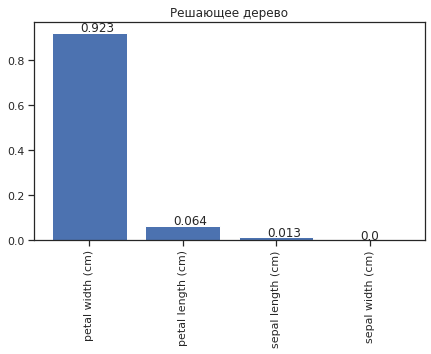

In [32]:
_,_=draw_feature_importances(dtc1, iris_x_df, 'Решающее дерево')

In [33]:
list(zip(iris_feature_names, SelectFromModel(dtc1).fit(iris_X, iris_y).get_support()))

[('sepal length (cm)', False),
 ('sepal width (cm)', False),
 ('petal length (cm)', False),
 ('petal width (cm)', True)]

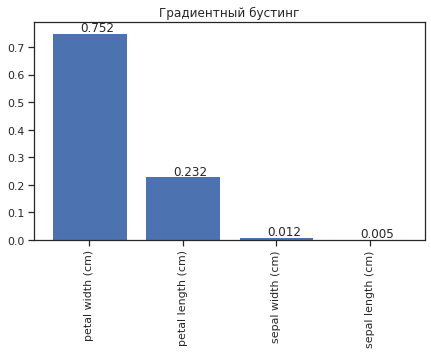

In [34]:
_,_=draw_feature_importances(gbc1, iris_x_df, 'Градиентный бустинг')

In [35]:
list(zip(iris_feature_names, SelectFromModel(gbc1).fit(iris_X, iris_y).get_support()))

[('sepal length (cm)', False),
 ('sepal width (cm)', False),
 ('petal length (cm)', False),
 ('petal width (cm)', True)]

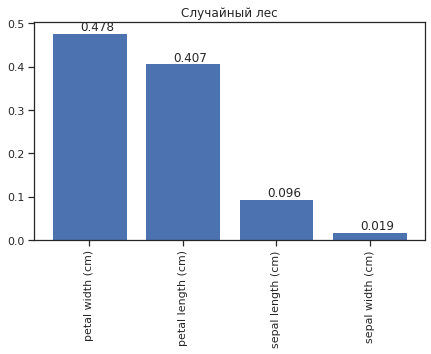

In [36]:
_,_=draw_feature_importances(rfc1, iris_x_df, 'Случайный лес')

In [37]:
list(zip(iris_feature_names, SelectFromModel(rfc1).fit(iris_X, iris_y).get_support()))

[('sepal length (cm)', False),
 ('sepal width (cm)', False),
 ('petal length (cm)', True),
 ('petal width (cm)', True)]